# End to End Machine Learning Project

We will implement a machine learning model based on the adult dataset. The data is extracted from [kaggle](https://www.kaggle.com/wenruliu/adult-income-dataset). 

A full description of the data can be found [here](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year.


The process to create a machine learning model we will go through contains the following steps:

1. Get the Data/Import
2. Data Exploration and Cleaning, Transformation (Pandas)
2. EDA - Data Exploration
3. Prepare the Data for Machine Learning (Train, Test, Val, Transform into numbers)
4. Select and Train Model
5. Fine Tune your Model
6. Evaluate you Model
7. Make Predictions

We will go through this process step by step to give you a feeling about this process.

In [108]:
# If plotly is not visualizing the graphs for you please run this code before executing the rest of the code
!conda install -c conda-forge jupyterlab-plotly-extension

import plotly
plotly.offline.iplot

Solving environment: ...working... done

# All requested packages already installed.



<function plotly.offline.offline.iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)>

What you usually do before every session is to import the libraries you need first.

In [98]:
import pandas as pd # Library to handle dataframes
import numpy as np # for scientific computing in python
import matplotlib.pyplot as plt #data visualization library

#I prefer to use plotly because the graphs are interactive and look nicer so I will import a second visualization library
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Basic machine learning library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

Typical libraries to use for machine learning are:

- **pandas:** Dataframes, ETL of data, Data Manipulation
- **numpy:** Linear Algebra and Scientific Computing
- **matplotlib:** Data Visualization
- **seaborn:** Data Visualization
- **sklearn:** Basic Machine Learning Library
- **tensorflow:** Deep Learning Library
- **pytorch:** Deep Learning Library
- **fastai:** Based on pytorch and commonly used for transfer learning

Depending on the problem other libraries are also in common use.

- **Image Classification:** Pillow, skimage, opencv
- **Natural Language Processing:** nltk, spacy

## Import the Data

If you have the data in a file format like `csv`, `xlsx` or `txt` you can use the `pandas` library to import the file to a `pandas` `dataframe`. 

In [58]:
adult_df = pd.read_csv("Data/adult.csv")

## Data Exploration & Cleaning

First of all we will explore how the dataset is build up. The first thing you should do is to check what columns does the dataframe has, how many empty cells it has and from what datatype the columns is. You can do that by using the method `info()` on the pandas dataframe. 

You will see the different columns names. Some are quite obvious what they contain and some are not that obvious. You can see that there are initially no empty cells as every columns has the same amount of non-null elements and last but not least the datatype is shown. 

In [59]:
# We are checking the columns names, the data types and the amount of non-null elements
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


The column `fnlwgt` does not clearly gives us a hindsight what this column is about. So we need usually need to find out what each of those columns means. But I did some research for you beforehand and you can find the meaning of each dataframe below.

- age: the age of an individual
- workclass: a general term to represent the employment status of an individual
- fnlwgt: final weight. In other words, this is the number of people the census believes the entry represents
- education: the highest level of education achieved by an individual.
- education-num: the highest level of education achieved in numerical form.
- marital-status: marital status of an individual. 
    - Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
- occupation: the general type of occupation of an individual
- relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. 
- race: Descriptions of an individual’s race
- sex: the biological sex of the individual
- capital-gain: capital gains for an individual
- capital-loss: capital loss for an individual
- hours-per-week: the hours an individual has reported to work per week
- native-country: country of origin for an individual
- the label: whether or not an individual makes more than $50,000 annually

In [60]:
adult_df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [61]:
adult_df.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


To explore the data frame we can also look into some statistics in the data. The `describe()` method can give you some fast statistical analysis of the data. The default is that it just gives you the statistics of numeric columns back. 

In [62]:
# Statistical exploration of the data
adult_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


What can also be helpful for understanding your dataset is to look what are the unique values for each column of your dataset. You can do that with the `unique()` method of a dataframe. Because we want to see all the unique values for each column we will loop over each column of the `adult_df` dataframe and print out the column name and the unique values.

In [63]:
#There are different ways to iterate over a dataframe. 
for col in adult_df:
    #if col == "fnlwgt":
    #    continue
    print(f"{col}: {sorted(adult_df[col].unique())}\n")

age: [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

workclass: ['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

fnlwgt: [12285, 13492, 13769, 13862, 14878, 18827, 19214, 19302, 19395, 19410, 19447, 19491, 19513, 19520, 19522, 19678, 19700, 19752, 19793, 19847, 19896, 19899, 19914, 20057, 20098, 20101, 20109, 20179, 20296, 20308, 20323, 20333, 20438, 20469, 20507, 20511, 20534, 20676, 20728, 20795, 20809, 20877, 20946, 20953, 20956, 21095, 21101, 21154, 21174, 21175, 21189, 21306, 21383, 21412, 21472, 21626, 21698, 21755, 21764, 21792, 21798, 21838, 21856, 21876, 21906, 22042, 22055, 22149, 22154, 22155, 22186, 22201, 22211, 22228, 22245, 22313, 22328, 22405, 22406

If you look through the unique values you can see a `?` in some of the columns as value. The questions marks don't make sense in this columns. In this dataset it actually shows that this cells are supposed to be empty. So let's tell pandas that this cells are empty by importing the dataset again with the `na_values` argument specified.

In [64]:
adult_df = pd.read_csv("Data/adult.csv", na_values = "?")
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Now you can see that the column `workclass` and `native-country` have less non-null values. Let's see first the amount of null values per column. The `isna()` columns return a dataframe indicating which cells are empty with the help of booleans. The `sum()` method summs per columns the numeric value. We can use this approach because booleans also representing numbers `True` is equivalent to 1 and `False` is equivalent 0.

In [65]:
adult_df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

To deal with this empty cells we can use different approaches. The easiest one is to drop the row containing empty cells. Another option would be to replace the empty values with other values like zero, the median, mode or mean. For further techniques feel free to google. The technique to use depends on the situation you have. Another option would be to drop the column completly if there are to many empty cells. 

We will drop the rows containing empty rows with the `dropna()` method.

In [66]:
adult_df = adult_df.dropna()

In [67]:
#Returns (rows, columns)
adult_df.shape

(45222, 15)

As you can see the number of rows is now lower compared to before. So dropping the empty cells seems to work.

## Exploratory Data Analysis

Seeing the data in number is one side of the exploring the data. To get a better understanding of the data it is also important to visualize the data. So let's visualize the data. We will not to a full analysis of the data because this will take too much time. Nonetheless, we will touch the purpose and see some code how to visualize data in python.

We will first use some build-in plotting function from pandas. So let's plot first a histogram of the continious data. This can be done be using the `hist()` method of dataframes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002521FDE3CC8>,
      dtype=object)

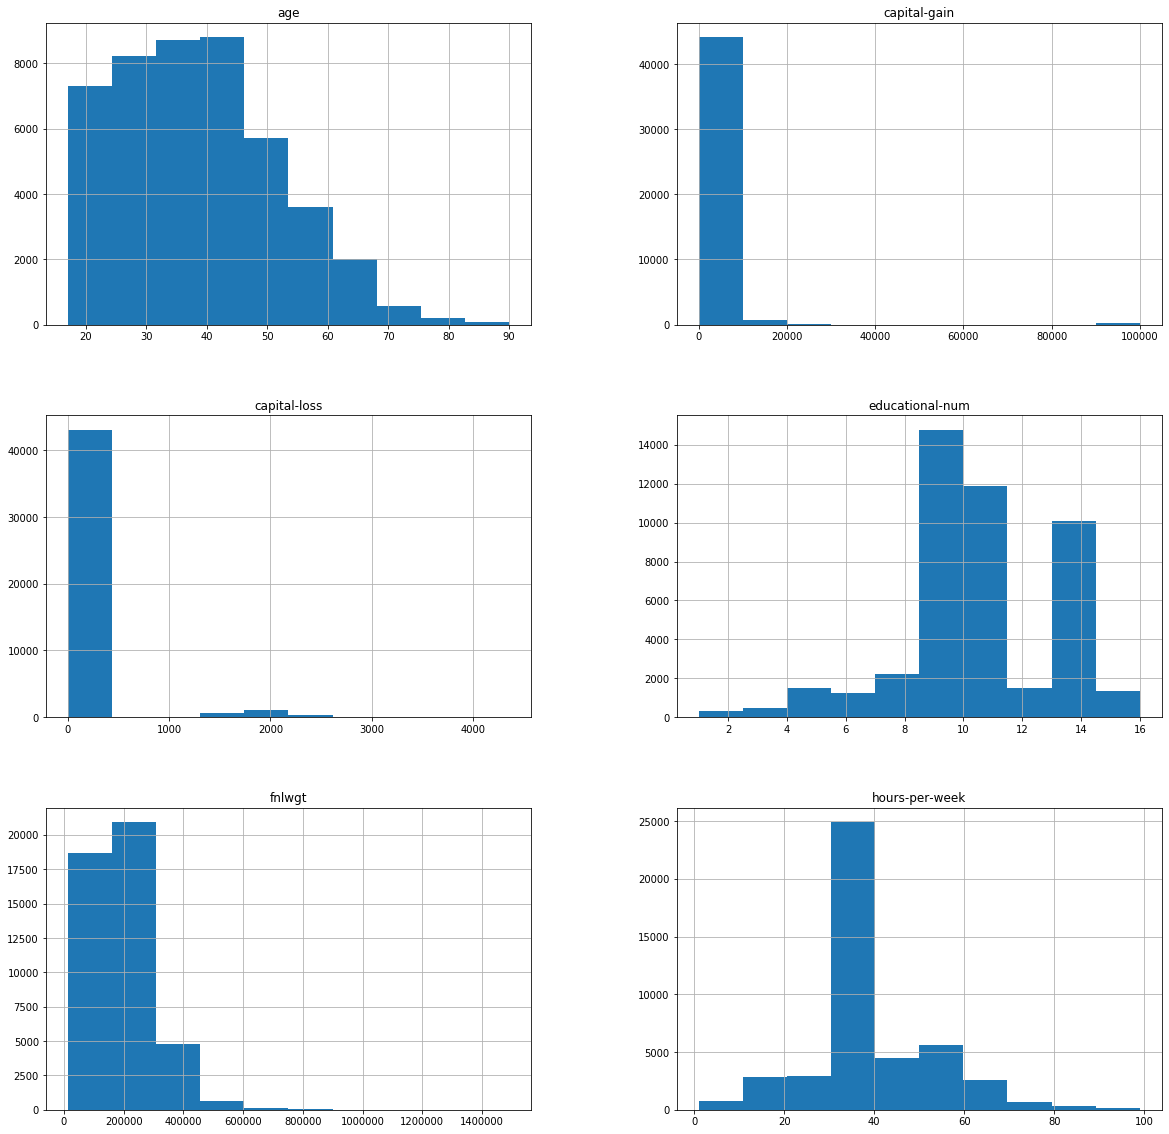

In [68]:
adult_df.hist(figsize = (20,20))

As you can see this does not look too nice and maybe we want to adapt our visualizations to gain more information from it. So let's use a visualization library to do it. We will use `plotly` in this training. Usually `matplotlib` is more used and I can recommend to learn also this library. 

Our interest is to predict if a person ears over or under 50k. With that interest in mind we will focus the data visualization on evaluating which of the variables might have an influence on the income. But before doing that let's visualize the characteristics of the included adults.

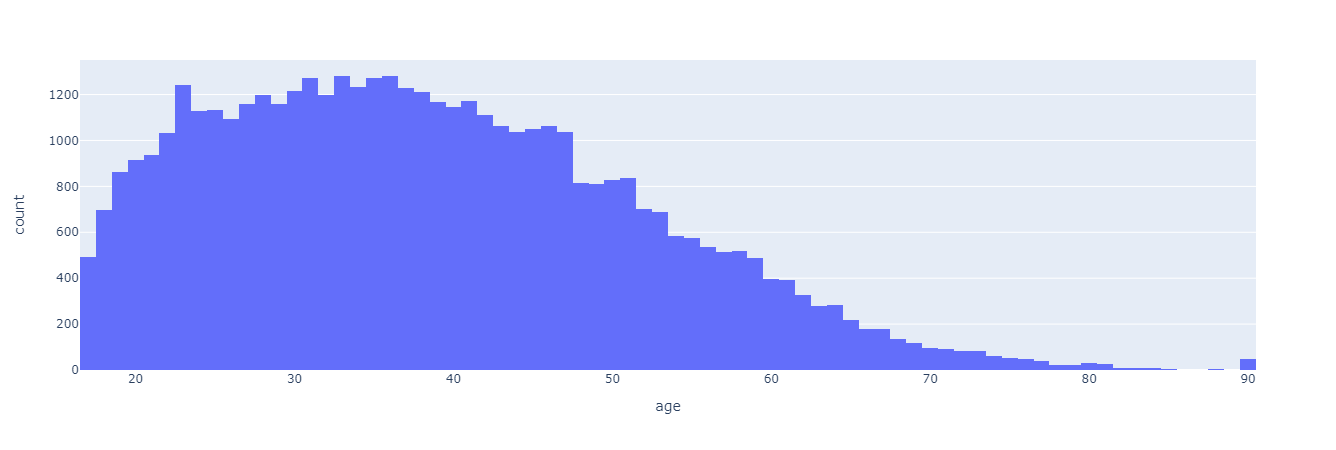

In [69]:
# Plotting the Age distribution depending on male and woman
#First we need to 
fig = px.histogram(adult_df, x = "age") #,color = "gender", nbins = 20, title = "Age Distribution")

#fig.update_layout(barmode = "group",
#                 xaxis=dict(title = "Age", showgrid = False, dtick = 5),
#                 yaxis = dict(title = "Count"), #,showgrid = False),
#                 legend = dict(title = "Gender"),
#                 plot_bgcolor = "rgb (255,255,255)")
fig.show()

You can see that we have on the one side that we have more `Male` individuals' than `Female` ones. The majority of people is around 20-50. The amount of elderly people over 60 is quite low. That also makes sense considering that the babyboomer generation should be in their middle ages in 1994. 

To get a complete picture let's also plot the count plots for the categorical data.

fig = make_subplots(rows=4, cols=2,
                    subplot_titles = ["Workclass", "Education", "Marital Status", "Occupation", "Relationship", "Race"],
                    horizontal_spacing = 0.1, vertical_spacing = 0.15, y_title = "Count"
                   )

fig.add_trace(
    go.Histogram(x= adult_df["workclass"]),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x= adult_df["education"]),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(x= adult_df["marital-status"]),
    row=2, col=1
)

fig.add_trace(
    go.Histogram(x= adult_df["occupation"]),
    row=2, col=2
)

fig.add_trace(
    go.Histogram(x= adult_df["relationship"]),
    row=3, col=1
)

fig.add_trace(
    go.Histogram(x= adult_df["race"]),
    row=3, col=2
)

fig.add_trace(
    go.Histogram(x= adult_df["gender"]),
    row=4, col=1
)

fig.add_trace(
    go.Histogram(x= adult_df["native-country"]),
    row=4, col=2
)

fig.update_layout(height = 1000, showlegend = False)
fig.show()

One thing you should always look at is the distribution of the target variable. Depending on the target distribution your model will perform differently and how you evaluate will the machine learning model will also change.

In [70]:
#Plot the distribution of the target variable
target_count = adult_df["income"].value_counts().reset_index()
target_count.columns = ["Income", "Count"]
target_count

,Income,Count
0,<=50K,34014
1,>50K,11208


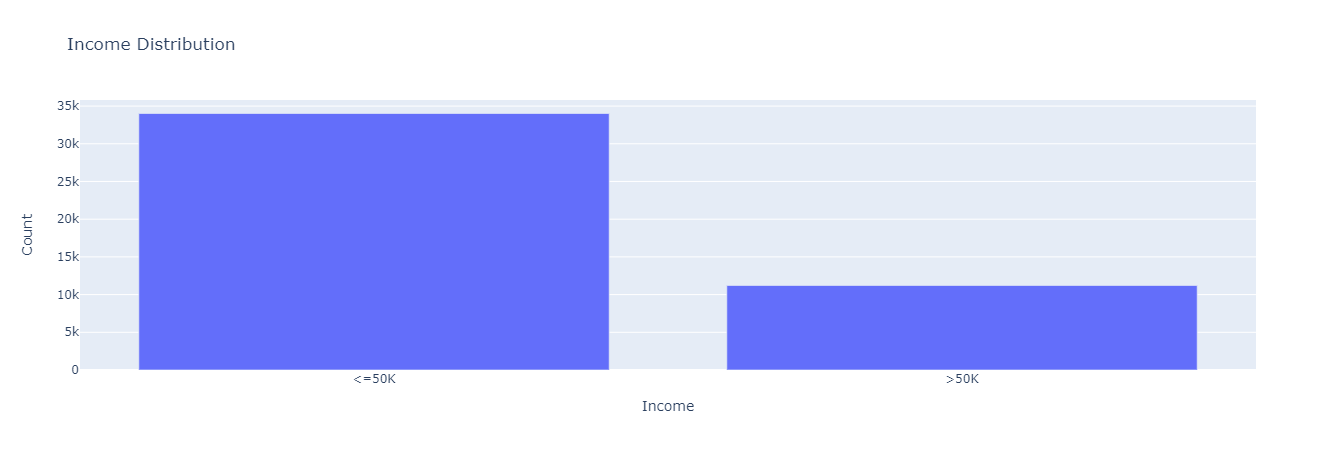

In [71]:
fig = px.bar(target_count, x = "Income", y = "Count", title = "Income Distribution")
fig.show()

You can see that we have an inbalanced dataset. There are more people earning less than 50k compared to the people earning more than 50k. Based on the source of the data this also makes sense. Remember the data is from the 1994 US cencus. 

So to proceed further let's see which of the attributes are influencing the income. We are looking into them, because it is important to understand which of the variable provide the machine learning model with information about the income of an individual. Based on that we will decide which variables we will drop, keep or combine into a new one. I can recommend to look separately on the influence of the categorical and continious data. We will not do a throughly analysis here, because the time is missing. But you should understand roughly why data visualization is important to develop a machine learning model. We will show an example based on the column `fnlwgt`

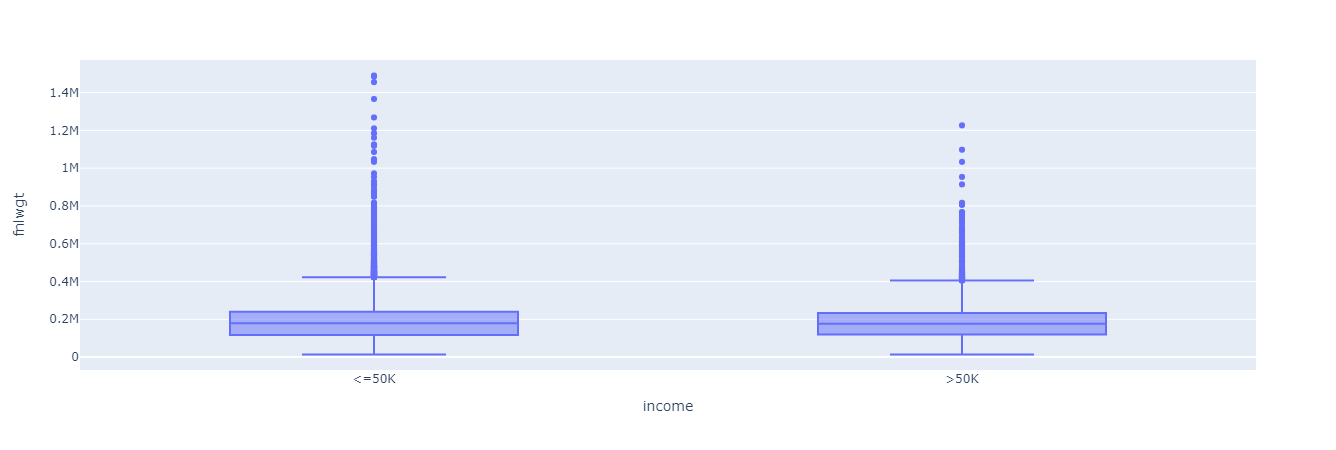

In [72]:
fig = px.box(adult_df, x = "income", y = "fnlwgt")
fig.show()

You can see that the variable `fnlwgt` does not really affect the income. Because it does not seem to influence the income this variable also don't give the machine learning model later more information to predict if if someone earns more or less than 50k. 

We will not visualize the rest of the data, but feel free to try it yourself with the matplotlib or plotly. But you can also find a very extensive EDA following this [link](https://www.kaggle.com/alokevil/simple-eda-for-beginners#5.-EDA).

# Preparing the Data

After getting all the information we need from the two previous steps it is now time to prepare our data. 

So first of all we will start by droping the column `fnlwgt`.

In [73]:
adult_df_prep = adult_df.drop("fnlwgt", axis = 1)
adult_df_prep.head(2)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


## Turn Categorical Variables into Numerical Values

The next step is including a transformation of all categorical variables into numerical variables. The reason behind this is that a machine learning model can't understand text. We need numeric data. What will haben is that we will give each value in the categorical columns a number which will represent this value. If we look into the `gender` column we can represent the value `male` with 0 and the value `female` with 1. We can do that easily with the help of `LabelEncoder()` from the `scikit-learn` librabry.

In [74]:
lb = LabelEncoder()

categoricals = ["workclass", "education", "marital-status", "occupation", "relationship", 
               "race", "gender", "native-country", "income"]

#To save the unique values per categorical columns
categorical_dic = {}

for categorical in categoricals:
    adult_df_prep[categorical] = lb.fit_transform(adult_df_prep[categorical])
    categorical_dic[categorical] = list(lb.classes_)

In [75]:
adult_df_prep.head(3)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,7,12,2,10,0,4,1,0,0,40,38,1


The next step is to separate the features from the target variable.

In [76]:
Y = adult_df_prep["income"]
X = adult_df_prep.drop("income", axis = 1)

## Scale the Data

Depending on the problem we will scale the data. Machine learning algorithms just see numbers — if there is a vast difference in the range, for example, few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort. So these more significant number starts playing a more decisive role while training the model.
The machine learning algorithm works on numbers and does not know what that number represents. A weight of 10 grams and a price of 10 dollars represents completely two different things — which is a no brainer for humans, but for a model as a feature, it treats both as same.

We will scale our data with the help of the `StandardScaler()` from the `scikit-learn` library.

In [77]:
sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-1.024983,-0.213443,-2.439977,-1.221559,0.942936,0.007557,0.993798,-2.018744,0.693813,-0.146733,-0.21878,-0.078120,0.262999
1,-0.041455,-0.213443,0.179902,-0.438122,-0.390005,-0.489170,-0.884479,0.384110,0.693813,-0.146733,-0.21878,0.754701,0.262999
2,-0.798015,-1.257163,-0.868050,0.737034,-0.390005,1.001011,-0.884479,0.384110,0.693813,-0.146733,-0.21878,-0.078120,0.262999
3,0.412481,-0.213443,1.227853,-0.046403,-0.390005,0.007557,-0.884479,-2.018744,0.693813,0.877467,-0.21878,-0.078120,0.262999
4,-0.344079,-0.213443,-2.701964,-1.613277,0.942936,0.255921,-0.258387,0.384110,0.693813,-0.146733,-0.21878,-0.910942,0.262999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,-0.213443,-0.868050,0.737034,-0.390005,1.497739,2.245982,0.384110,-1.441310,-0.146733,-0.21878,-0.244684,0.262999
45218,0.109857,-0.213443,0.179902,-0.438122,-0.390005,0.007557,-0.884479,0.384110,0.693813,-0.146733,-0.21878,-0.078120,0.262999
45219,1.471665,-0.213443,0.179902,-0.438122,2.275877,-1.482624,1.619890,0.384110,-1.441310,-0.146733,-0.21878,-0.078120,0.262999
45220,-1.251951,-0.213443,0.179902,-0.438122,0.942936,-1.482624,0.993798,0.384110,0.693813,-0.146733,-0.21878,-1.743763,0.262999


## Split the Data
The next step is to separate the data in training and test data. The idea behind this is to evaluate the model on data it has never seen. Technically there is also something called a validation set. But because we will not fine-tune our model we will not have a validation set. Below you can find the definition for each of those sets.

|Dataset|Definition|
|:-|:-|
|Training Set| The actual dataset that we use to train the model (weights and biases in the case of Neural Network). The model sees and learns from this data.|
|Validation Set| The validation set is used to evaluate a given model, but this is for frequent evaluation. The data is used to fine-tune the model hyperparameters. Hence the model occasionally sees this data, but never does it “Learn” from this. The validation is used to set results and update higher level hyperparameters. So the validation set in a way affects a model, but indirectly.|
|Test Set|The Test dataset provides the gold standard used to evaluate the model. It is only used once a model is completely trained |

To split the data we will used the preprogrammed `train_test_split()` from the `scikit-learn` library.

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .2, random_state = 42)

In [81]:
# Lets check if that worked by comparing the number of rows of the features and the target
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

# Select and Train the Model

Now it is time to train a the machine learning model. We will train several machine learning models and compare which of those performs best on the dataset. 

We will use the following machine learning algorithms.
- Logistic Regression
- K Nearest Neigbors (KNN)
- Decision Tree
- Random Forest
- Gradient Boosting

We will use the default values for the algorithms because they are usually set to values that work usually well.

In [84]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
#??LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Source:        
class LogisticRegression(BaseEstimator, LinearClassifierMixin,
                         SparseCoefMixin):
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. *

In [94]:
# K Nearest Neigbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#??KNeighborsClassifier

In [95]:
#Decicion Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# ??DecisionTreeClassifier

In [102]:
#Gradient Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#??GradientBoostingClassifier

In [103]:
# RandomForest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#??RandomForestClassifier

# Predict and Evaluate the Model

The next step is to evaluate the model. We will do that with the help of the test data. But before we go there I will introduce you to some basic evaluation metrics commonly used in machine learning. Which metrics are important for your model depends on the problem you have. At the other hand that are not all evaluation metrics. There are much more out there. This are just the common ones.

To remind you `>50k` is our positive target and is labelled with `1` which is equivalent to `True` and `<=50k` is our negative target and labelled with `0` which is equivalent to `False`

## Confusion Matrix

![Confusion Matrix](Images/confusion-matrix.png)

**Source:** [https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/](https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/)

- True Positives (TP): The model predicted that the individual earns over 50k and the individual really does earn more than 50k.
- True Negatives (TN): The model predicted that the individual earns less than 50k and the individual really does earn less than 50k.
- False Positives (FP): The model predicted that the individual earns more than 50k but the individual earns in reality less than 50k.
- False Negatives (FN): The model predicted that the individual earns less than 50k but the individual earns in reality more than 50k.

Based on the Confusion Matrix you can calculate different metrics, that are important to evaluate the model you develop. The metrics are Accuracy, Recall, Precision and F1.

## Accuracy

The accuracy tells that overall how often the model is making a correct prediction.

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

## Recall

Recall is the ratio of the positive (1) class correctly predicted to the total number of values belonging to the positive class in reality.

$$Recall = \frac{TP}{TP + FN}$$


## Precision

Precision indicates the ratio of **correct positive** predictions to the total amount of positive predictions.

$$Precision = \frac{TP}{TP + FP}$$

## F1

F1-score is a metric that combines recall and precision by taking their harmonic mean.

$$ F1-Score = \frac{2*Recall*Precision}{Recall + Precision}$$


After getting a short indroduction to common metrics we will now evaluate the models to decide which of those is the best. 

In [107]:
#Save all models to a dictionary

models = {"Logistic Regression": logreg,
          "K Nearest Neighbors": knn,
          "Decision Tree": tree,
          "Gradient Boostng": gb_clf,
          "Random Forest": rf_clf
         }

for model in models:
    
    prediction = models[model].predict(x_test)
    
    confusion = pd.DataFrame(confusion_matrix(y_test, prediction))
    confusion.columns = ["Actual Negative", "Actual Positive"]
    confusion.index = ["Predicted Negative", "Predicted Positive"]
    
    print(model)
    print("Accuracy:", accuracy_score(y_test, prediction))
    print("Recall:", recall_score(y_test, prediction))
    print("Precision:", precision_score(y_test, prediction))
    print("F1-Score:", f1_score(y_test,prediction))
    print(f"{confusion}\n")
    

Logistic Regression
Accuracy: 0.8223327805417358
Recall: 0.44802541988197914
Precision: 0.716255442670537
F1-Score: 0.5512426696453505
                    Actual Negative  Actual Positive
Predicted Negative             6451              391
Predicted Positive             1216              987

K Nearest Neighbors
Accuracy: 0.8351575456053068
Recall: 0.6109850204266909
Precision: 0.6797979797979798
F1-Score: 0.6435572555582119
                    Actual Negative  Actual Positive
Predicted Negative             6208              634
Predicted Positive              857             1346

Decision Tree
Accuracy: 0.8133775566611388
Recall: 0.596005447117567
Precision: 0.6219801042160114
F1-Score: 0.608715808993973
                    Actual Negative  Actual Positive
Predicted Negative             6044              798
Predicted Positive              890             1313

Gradient Boostng
Accuracy: 0.86489773355445
Recall: 0.6009986382206083
Precision: 0.794241151769646
F1-Score: 0.68423772609